In [225]:
from generate_lib import *

In [226]:
def get_col(head, header):
    return header.index(head)

def plot_data():
    filepath = os.path.join(os.pardir, 'results', 'sum-exp-values', 'sum-exp-values.csv')

    (header, data) = csv_2_data(filepath)

    aligned_data = list()
    random_data = list()
    multiplicities = list()
    xlabels = list()

    for head in header:
        if '(Aligned Omega)' in head:
            n = head.split(' ')[0]
            multiplicities.append(int(n))
            xlabels.append(n + ' Planets')

            aligned_data.append(data[get_col(head, header)])
        elif '(Random Omega)' in head:
            random_data.append(data[get_col(head, header)])

    assert len(aligned_data) == len(random_data)

    aligned_data = np.array(aligned_data).astype(float)
    random_data = np.array(aligned_data).astype(float)

    (fig, axes) = plt.subplots(1, 2)
    fig.set_size_inches(8.0, 4)

    xmin = multiplicities[0]

    assert xmin == np.min(multiplicities)

    xloc = np.arange(len(multiplicities)) + xmin

    plt.subplot(1, 2, 1)
    plt.plot([], [], color='red', label = 'Aligned Omega')
    
    for idx in range(len(xloc)):
        plt.hlines(random_data[idx], xmin+idx-0.5, xmin+idx+0.5, color = (1, 0, 0, 0.01))
    
    plt.subplot(1, 2, 2)
    plt.plot([], [], color='blue', label = 'Random Omega')

    for idx in range(len(xloc)):
        plt.hlines(aligned_data[idx], xmin+idx-0.5, xmin+idx+0.5, color = (0, 0, 1, 0.1))

    for ax in axes:
        ax.set_xticks(xloc, xlabels, rotation=45)

    fig.legend()
    plt.suptitle('Summed Expectation Values by Multiplicity')
    plt.show()

    savepath = os.path.join(os.pardir, 'results', 'sum-exp-values', 'sum-exp-values-by-mult')
    fig.savefig(savepath, dpi = 300, pad_inches = 1.0)


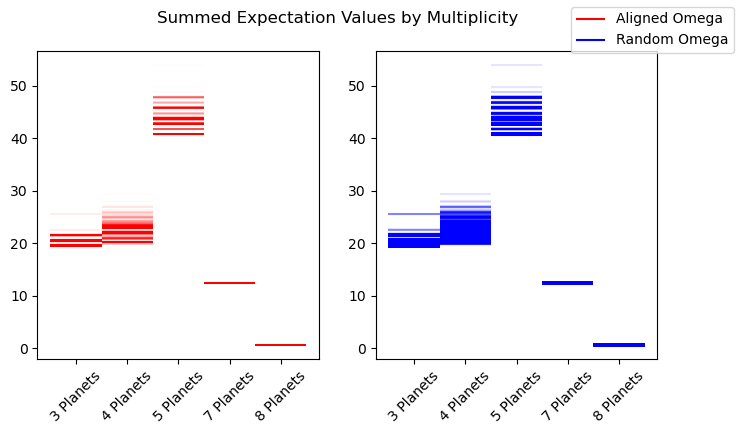

In [227]:
plot_data()